In [635]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [636]:
path = 'Mt_Everest_Ascent_Data.csv'
df = pd.read_csv(path)
df.head()

,Peak,Name,Yr/Seas,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Tenzing Norgay,1953 Spr,29-May,11:30,India,M,39,Y,.,Nepal
1,EVER,Edmund Percival Hillary,1953 Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
2,EVER,Juerg P. Marmet,1956 Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
3,EVER,Ernst Schmied,1956 Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal
4,EVER,Adolf (Dolf) Reist,1956 Spr,24-May,11:00,Switzerland,M,35,Y,.,Nepal


In [637]:
print('-----------------Data info--------------------')
df.info()
print('-----------------Data statistical (numerical features) measures--------------------')
print(df.describe())

-----------------Data info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10184 entries, 0 to 10183
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Peak          10184 non-null  object
 1   Name          10184 non-null  object
 2   Yr/Seas       10184 non-null  object
 3   Date          10184 non-null  object
 4   Time          8541 non-null   object
 5   Citizenship   10184 non-null  object
 6   Sex           10184 non-null  object
 7   Age           10184 non-null  int64 
 8   Oxy           10184 non-null  object
 9   Dth           10184 non-null  object
 10  Host          10184 non-null  object
dtypes: int64(1), object(10)
memory usage: 875.3+ KB
-----------------Data statistical (numerical features) measures--------------------
               Age 
count  10184.000000
mean      34.690888
std       10.304911
min        0.000000
25%       28.000000
50%       34.000000
75%       41.000000
m

90% Of features are object type, Detailed analysis will be necessary to better understand the distinctive patterns

In [638]:
# Strip trailing spaces from column names
print(df.columns)
df.columns = df.columns.str.strip()

# Delete peak column
df = df.drop(columns=['Peak'],axis=1)

Index(['Peak ', 'Name ', 'Yr/Seas ', 'Date ', 'Time ', 'Citizenship ', 'Sex ',
       'Age ', 'Oxy ', 'Dth ', 'Host '],
      dtype='object')


#### Breaking down Features

In [639]:
#'Yr/Seas' to Year, Season
df[["Year", "Season"]] = ( 
    df["Yr/Seas"]          
    .str                         
    .split(" ", expand=True)   # splitting on " "  
)
df = df.drop(columns=['Yr/Seas'],axis=1)
#Season rename
#print(df['Season'].unique()) --> ['Spr' 'Aut' 'Win' 'Sum']
df['Season'] = df['Season'].replace({
    'Spr': 'Spring',
    'Aut': 'Autumn',
    'Win': 'Winter',
    'Sum': 'Summer'
})

df['Oxy'] = df['Oxy'].replace({
    'No': 'N'
})

#Date format 'day-Month' --> no need exactly day
df['Month'] = df['Date'].str.split('-').str[1]
df = df.drop(columns=['Date'],axis=1)

# Due each person has a different climbing rate, 'Time' has not importance.
df = df.drop(columns=['Time'],axis=1)

In [640]:
# Dth- Did the ascent result in death?
# Possibles values: '.', 'Y' --> Asume Y = Yes, Let's do True or False
df['Dth'] = df['Dth'].replace({
    '.': 'F',
    'Y': 'T'
})

In [641]:
#Object to int
df['Year'] = df['Year'].astype(int)
print(df.dtypes)

Name           object
Citizenship    object
Sex            object
Age             int64
Oxy            object
Dth            object
Host           object
Year            int64
Season         object
Month          object
dtype: object


### Dataset after Transformations

In [642]:
df.tail()

,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month
10179,Xiao-Lin Li,China,M,35,Y,F,China,2020,Spring,May
10180,Xin-Guo Li,China,M,0,Y,F,China,2020,Spring,May
10181,Ping Liu,China,F,39,Y,F,China,2020,Spring,May
10182,Ying Ma,China,F,42,Y,F,China,2020,Spring,May
10183,Zhi-Gang Ru,China,M,35,Y,F,China,2020,Spring,May


#### Let's findout some outliers

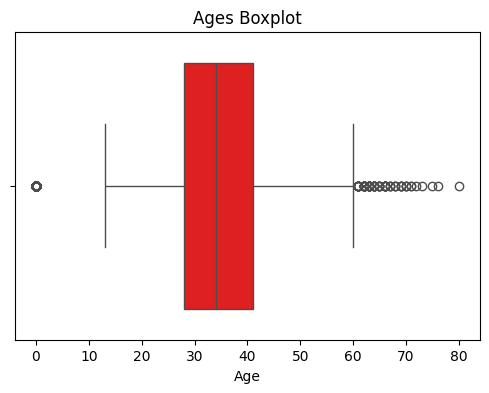

In [643]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'], color="red")
plt.title("Ages Boxplot")
plt.show()

Thinking meaningfully let's drop people less than 18 years and more than 60

In [644]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 60)]  #297 rows deleted


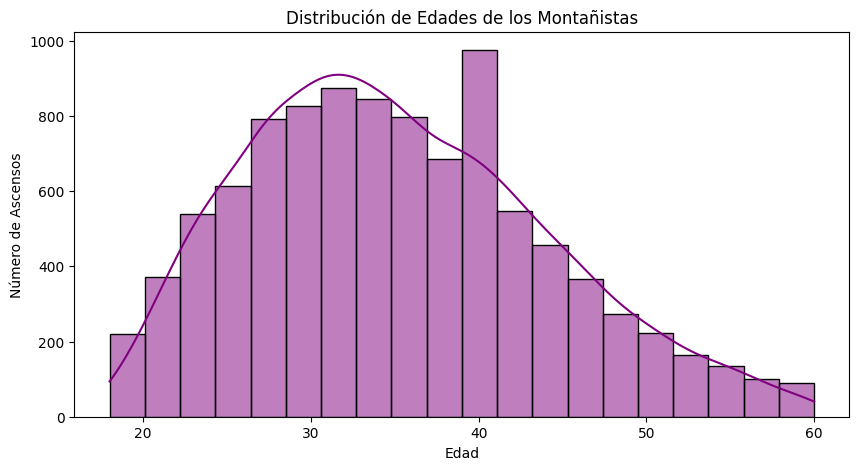

In [645]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].astype(float), bins=20, kde=True, color="purple")
plt.xlabel("Edad")
plt.ylabel("Número de Ascensos")
plt.title("Distribución de Edades de los Montañistas")
plt.show()

#### Looking for patterns

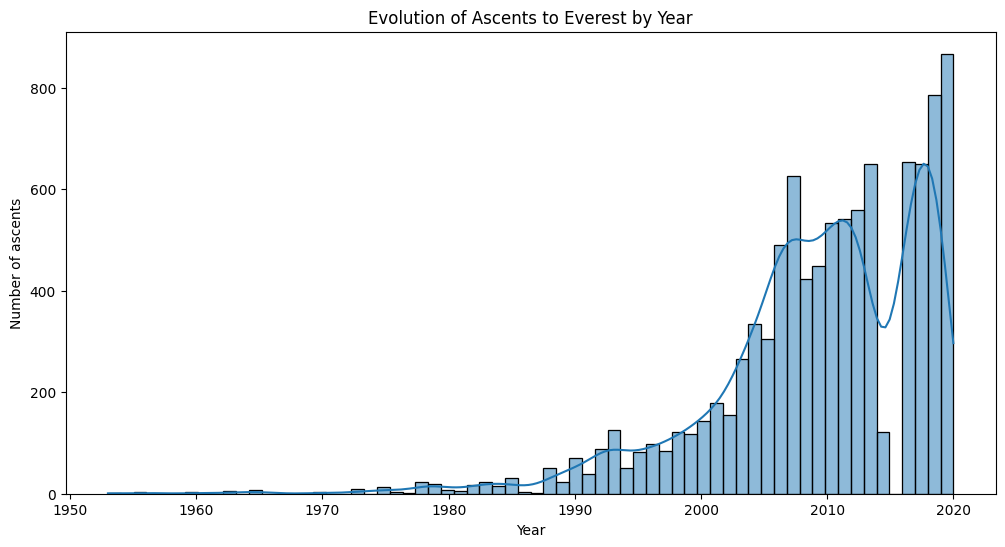

In [646]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'].astype(int), bins=66, kde=True)
plt.xlabel("Year")
plt.ylabel("Number of ascents")
plt.title("Evolution of Ascents to Everest by Year")
plt.show()


In [647]:
ascents_2015 = df[df['Year'] == 2015]
print(f"Number of people who climbed in 2015: {len(ascents_2015)}") 
# The earthquake and strike contributed to the cancellation of the 2015 spring climbing season on Everest.

Number of people who climbed in 2015: 0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\621698983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dth_counts.index, y=dth_counts.values, palette=['green', 'red'])


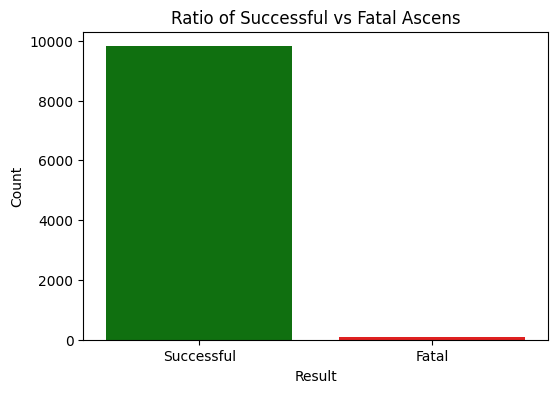

In [648]:
dth_counts = df['Dth'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=dth_counts.index, y=dth_counts.values, palette=['green', 'red'])
plt.xlabel("Result")
plt.ylabel("Count")
plt.title("Ratio of Successful vs Fatal Ascens")
plt.xticks(ticks=[0,1], labels=['Successful', 'Fatal'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\2812736480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Season', order=['Winter', 'Spring', 'Summer', 'Autumn'], palette="coolwarm")


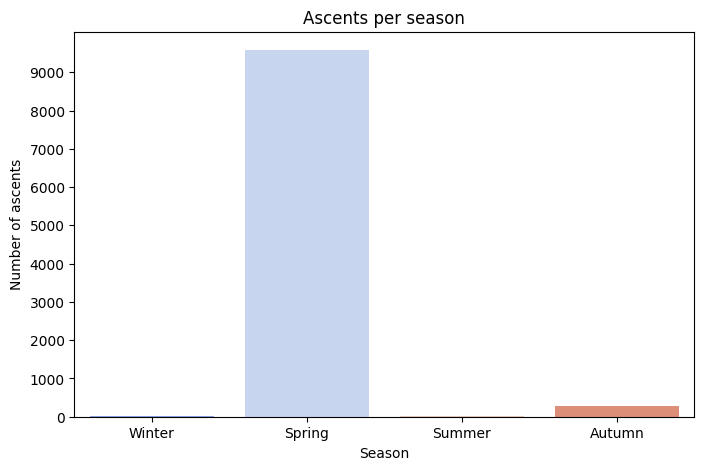

In [649]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Season', order=['Winter', 'Spring', 'Summer', 'Autumn'], palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Number of ascents")
plt.title("Ascents per season")
plt.yticks(np.arange(0, df['Season'].value_counts().max() + 1, step=1000))  
plt.show()


I'll deleted data from Winter, Summer and Autumn, do not provide statistical values

In [650]:
print(df['Season'].value_counts())
df = df[df['Season'] == 'Spring']


Season
Spring    9580
Autumn     283
Winter      15
Summer       9
Name: count, dtype: int64


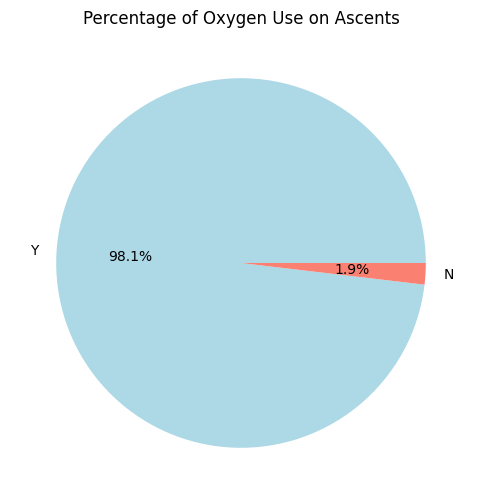

In [651]:
plt.figure(figsize=(6, 6))
df['Oxy'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.ylabel('')
plt.title("Percentage of Oxygen Use on Ascents")
plt.show()

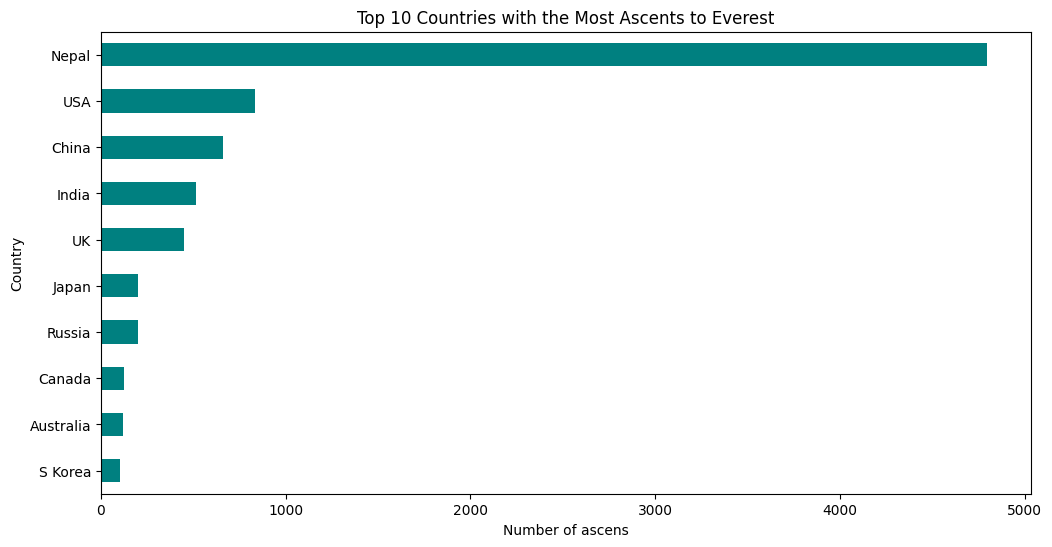

In [652]:
plt.figure(figsize=(12, 6))
df['Citizenship'].value_counts().head(10).plot(kind='barh', color='teal')
plt.xlabel("Number of ascens")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Most Ascents to Everest")
plt.gca().invert_yaxis()
plt.show()


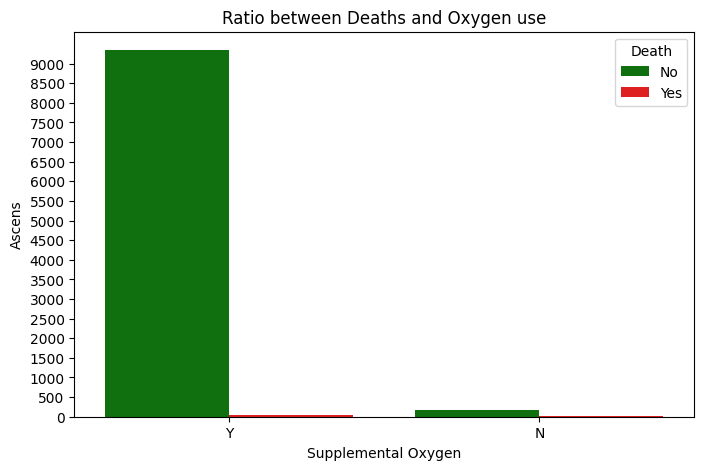

In [653]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Oxy', hue='Dth', palette={'F': 'green', 'T': 'red'})
plt.xlabel("Supplemental Oxygen")
plt.ylabel("Ascens")
plt.title("Ratio between Deaths and Oxygen use")
plt.legend(title="Death", labels=["No", "Yes"])
plt.yticks(np.arange(0, df['Oxy'].value_counts().max() + 1, step=500))

plt.show()

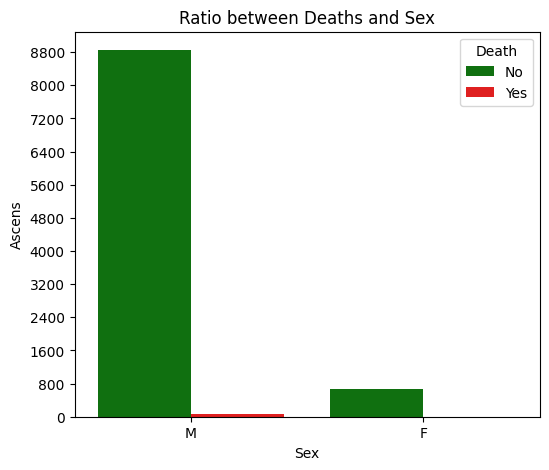

In [654]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Sex', hue='Dth', palette={'F': 'green', 'T': 'red'})
plt.xlabel("Sex")
plt.ylabel("Ascens")
plt.title("Ratio between Deaths and Sex")
plt.legend(title="Death", labels=["No", "Yes"])
plt.yticks(np.arange(0, df['Sex'].value_counts().max() + 1, step=800))

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\699838825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dth', y='Age', palette={'F': 'blue', 'T': 'red'})


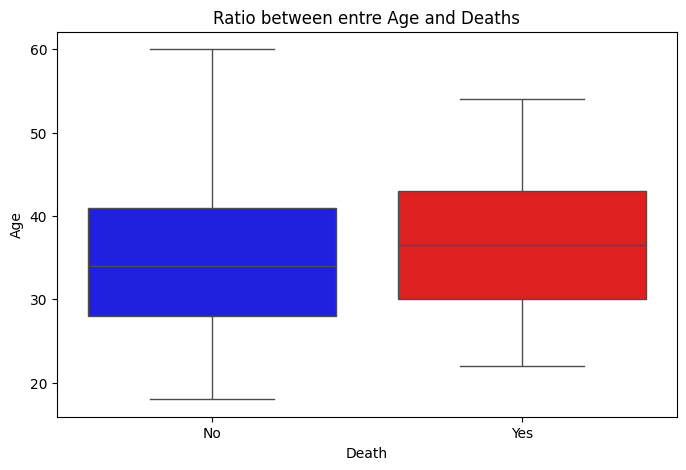

In [655]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Dth', y='Age', palette={'F': 'blue', 'T': 'red'})
plt.xlabel("Death")
plt.ylabel("Age")
plt.title("Ratio between entre Age and Deaths")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()


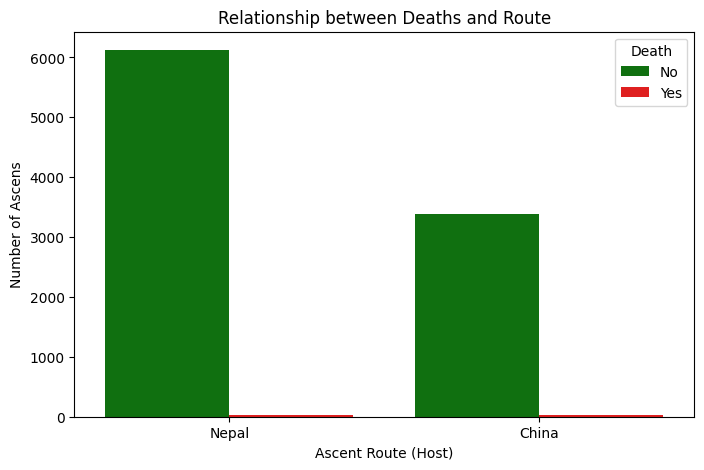

In [656]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Host', hue='Dth', palette={'F': 'green', 'T': 'red'})
plt.xlabel("Ascent Route (Host)")
plt.ylabel("Number of Ascens")
plt.title("Relationship between Deaths and Route")
plt.legend(title="Death", labels=["No", "Yes"])
plt.show()

['May' 'Apr' 'Jun']


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\3874687157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_spring, x='Month', palette="coolwarm")


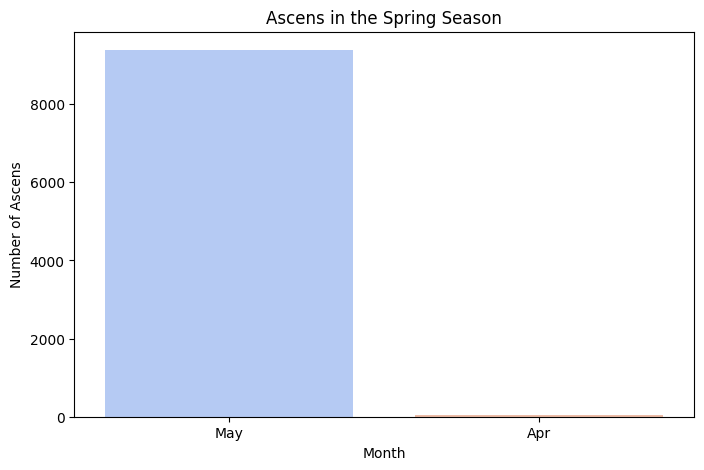

In [657]:
print(df['Month'].unique())

spring_months = ["Apr", "May"]
df_spring = df[df['Month'].isin(spring_months)]

plt.figure(figsize=(8,5))
sns.countplot(data=df_spring, x='Month', palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Ascens")
plt.title("Ascens in the Spring Season")
plt.show()

In [658]:
# Drop April data --> It will difficult analysis 
df = df[df['Month'] == 'May']


So, to evaluate and apply ML Classiffication I only kept with Ascens from May

<bound method DataFrame.count of                                        Name Citizenship Sex  Age Oxy Dth  \
88        Ang Phu Sherpa (Khumjung, Khumbu)       Nepal   M   28   Y   T   
262                        Dimitar Ilievski  Yugoslavia   M   35   Y   T   
266    Phu Dorje Sherpa (Pangboche, Khumbu)       Nepal   M   26   Y   T   
272               Eugeniusz (Genek) Chrobak      Poland   M   49   Y   T   
382                        Junichi Futagami       Japan   M   39   Y   T   
...                                     ...         ...  ..  ...  ..  ..   
9391                    Seamus Sean Lawless     Ireland   M   39   Y   T   
9644                       Donald Lynn Cash         USA   M   54   Y   T   
9707                    Nihal Ashpak Bagwan       India   M   26   Y   T   
10060                          Kalpana Dash       India   F   52   Y   T   
10119                   Robin Haynes Fisher          UK   M   44   Y   T   

        Host  Year  Season Month  
88     Nepal  1979 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\2869624372.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, palette="Reds")


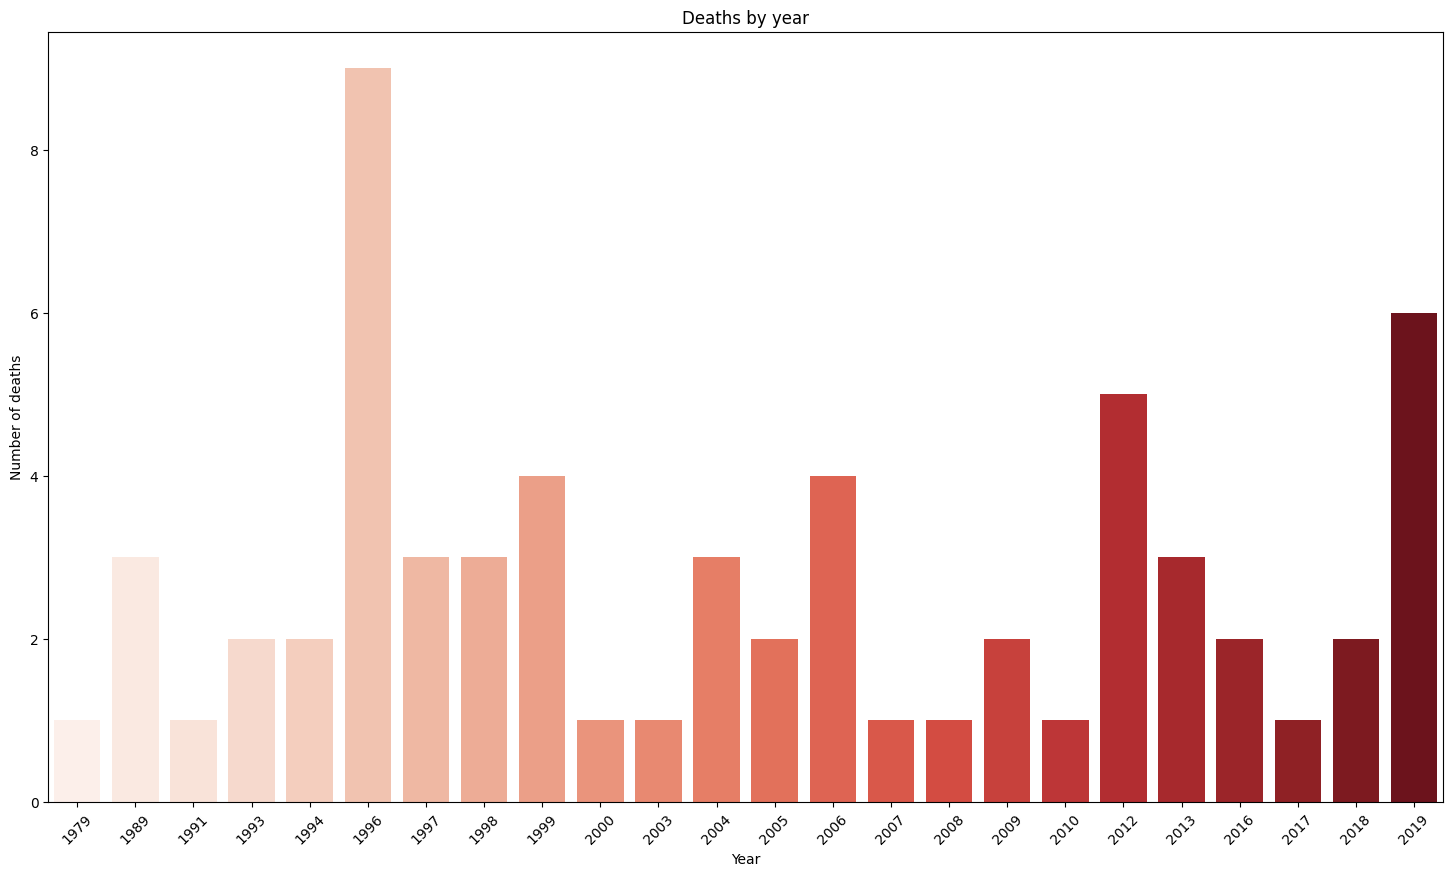

In [659]:
print(df[df['Dth'] == 'T'].count)
deaths_per_year = df[df['Dth'] == 'T'].groupby('Year').size()
plt.figure(figsize=(18,10))
sns.barplot(x=deaths_per_year.index, y=deaths_per_year.values, palette="Reds")
plt.xlabel("Year")
plt.ylabel("Number of deaths")
plt.title("Deaths by year")
plt.xticks(rotation=45)
plt.show()

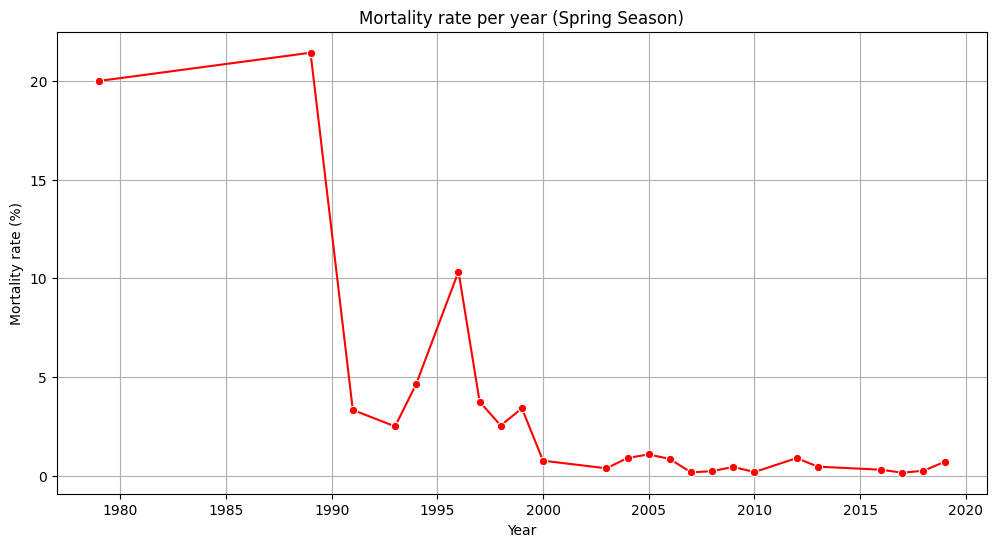

In [660]:
ascents_per_year = df.groupby('Year').size()
deaths_per_year = df[df['Dth'] == 'T'].groupby('Year').size()

# mortality rate
mortality_rate = (deaths_per_year / ascents_per_year) * 100
plt.figure(figsize=(12,6))
sns.lineplot(x=mortality_rate.index, y=mortality_rate.values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Mortality rate (%)")
plt.title("Mortality rate per year (Spring Season)")
plt.grid(True)
plt.show()

As the years go by, it seems that people are more prepared or have more knowledge to make the ascense

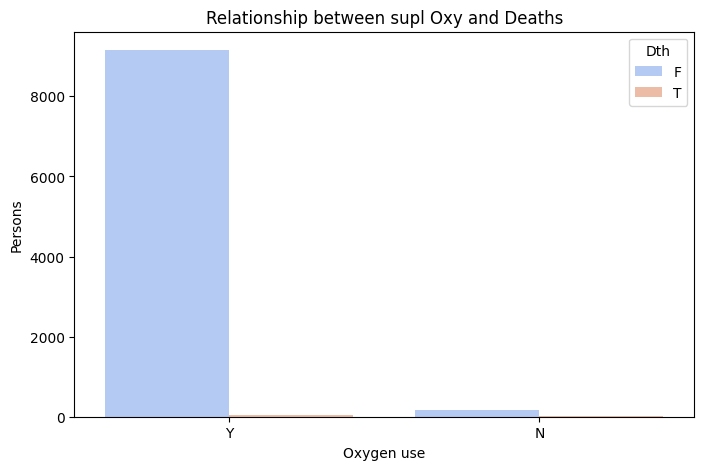

In [661]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Oxy', hue='Dth', palette='coolwarm')

plt.xlabel("Oxygen use")
plt.ylabel("Persons")
plt.title("Relationship between supl Oxy and Deaths")

plt.show()

## Machine Learning model to predict possibles deaths 

In [662]:
print(df.dtypes)
print('--------------')
print(df.head())

Name           object
Citizenship    object
Sex            object
Age             int64
Oxy            object
Dth            object
Host           object
Year            int64
Season         object
Month          object
dtype: object
--------------
                      Name  Citizenship Sex  Age Oxy Dth   Host  Year  Season  \
0          Tenzing Norgay         India   M   39   Y   F  Nepal  1953  Spring   
1  Edmund Percival Hillary  New Zealand   M   33   Y   F  Nepal  1953  Spring   
2          Juerg P. Marmet  Switzerland   M   28   Y   F  Nepal  1956  Spring   
3            Ernst Schmied  Switzerland   M   31   Y   F  Nepal  1956  Spring   
4       Adolf (Dolf) Reist  Switzerland   M   35   Y   F  Nepal  1956  Spring   

  Month  
0   May  
1   May  
2   May  
3   May  
4   May  


Columns to delete: Name, Citizenship, Season (Always Spring), Month(Always May) ; 
Columns convert to numerical: Sex, Oxy, Dth ; 
Columns One Hot Encoding: Host

In [663]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [664]:
# drop unnecesary columns
df = df.drop(columns=["Name","Citizenship",'Season','Month'])

# categorical to numeric
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Oxy'] = df['Oxy'].map({'Y': 1, 'N': 0})
df['Dth'] = df['Dth'].map({'T': 1, 'F': 0})

# One-Hot Encoding 'Host'
df = pd.get_dummies(df, columns=['Host'], drop_first=False)

<Axes: >

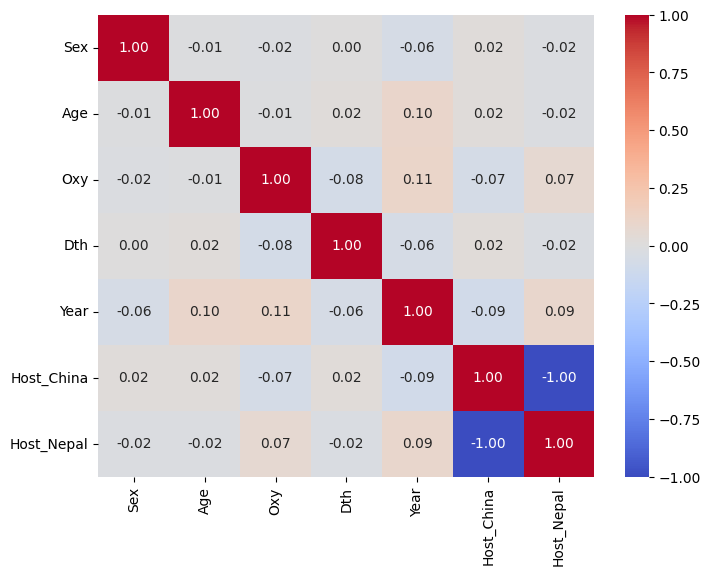

In [665]:
# numerical correlations
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


Weaks correlations

In [666]:
# Split data
X = df.drop(columns='Dth')
y = df['Dth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


### Random Forest

In [667]:

model = RandomForestClassifier(n_estimators=500, random_state=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9910485933503836
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2327
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2346
   macro avg       0.50      0.50      0.50      2346
weighted avg       0.98      0.99      0.99      2346



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21812\1563630879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


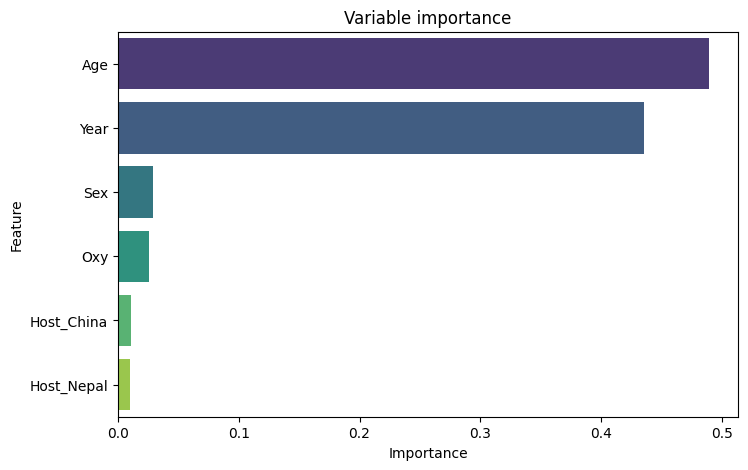

In [668]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Variable importance")
plt.show()

Due we have much more no-death cases than deaths and the correlations between variables are low , the model cannot predict deaths